In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
#requests
url = "https://id.wikipedia.org/wiki/Daftar_negara_menurut_jumlah_pengguna_Internet"
response = requests.get(url)

#Merapikan konten html
soup = BeautifulSoup(response.content, "html.parser")

#Mencari tabel yang berisi data negara
table = soup.find("table", class_="wikitable sortable")

#Mencari data di setiap baris dalam tabel
rows = table.find_all("tr")

#Extract data nama negara, populasi, dan pengguna inter kedalam array
countries = []
user = []
population = []
for row in rows[1:]:
    columns = row.find_all("td")
    if len(columns) >= 4:
        country_link = columns[1].find("a")
        population_link = columns[2].find("a")
        user_link = columns[3].find("a")

        country = country_link.text.strip() if country_link else columns[1].text.strip()
        users = user_link.text.strip() if user_link else columns[2].text.strip()
        populations = population_link.text.strip() if population_link else columns[3].text.strip()

        countries.append(country)
        population.append(populations)
        user.append(users)

In [3]:
#Mengubah menjadi DataFrame
data = {
    "Country": countries,
    "Internet_User": user,
    "Population": population}

df = pd.DataFrame(data)

In [4]:
#Mengubah tipe data menjadi integer
df["Internet_User"] = df["Internet_User"].str.replace(",", "").astype(int)
df["Population"] = df["Population"].str.replace(",", "").astype(int)

In [5]:
#Menghitung persentase pengguna internet
df["Percentage_of_Users"] = (df["Internet_User"] / df["Population"]) * 100

In [6]:
#Membagi persentase pengguna menjadi 4 kelompok 
bins = [0, 60, 70, 80, 100]
labels = ['<60%', '60%-70%', '70%-80%', '>80%']
df['Percentage_Group'] = pd.cut(df['Percentage_of_Users'], bins=bins, labels=labels, right=False)

In [7]:
#Menghitung jumlah negara dalam setiap kelompok
group_counts = df['Percentage_Group'].value_counts().sort_index()

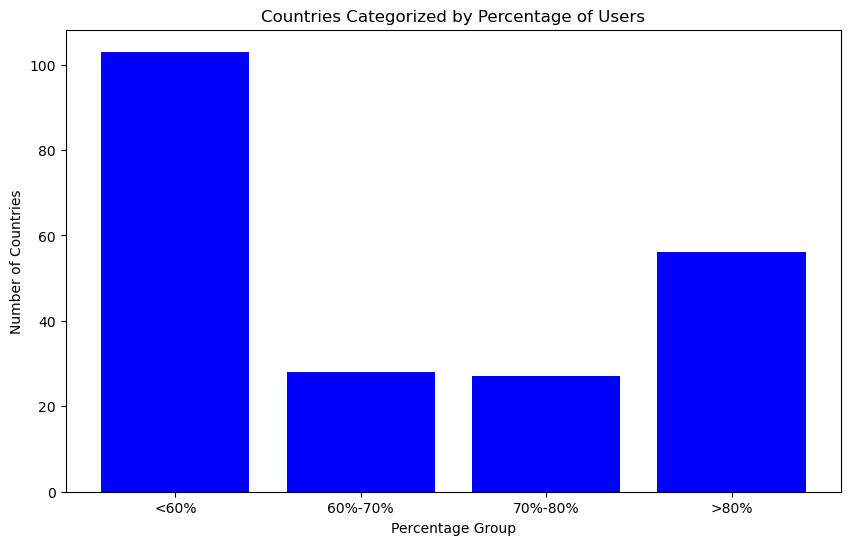

In [8]:
#Menampilkan visualisasi
plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts.values, color='blue')
plt.xlabel('Percentage Group')
plt.ylabel('Number of Countries')
plt.title('Countries Categorized by Percentage of Users')

plt.show()

In [16]:
url2 = "https://www.imdb.com/chart/top/?sort=rk,asc&mode=simple&page=1"
response2 = requests.get(url2)

soup2 = BeautifulSoup(response2.content, "html.parser")

# Mencari elemen <td> dengan kelas "titleColumn" yang berisi judul film
title_column = soup2.find_all("td", class_="titleColumn")
rating_elements = soup2.find_all("td", class_="ratingColumn imdbRating")

list_titles = []
years = []
rating = []
for title in title_column:
    # Mengambil elemen <a> di dalam elemen <td>
    title_link = title.find("a")
    
    # Mengambil teks judul film dari elemen <a>
    titles = title_link.text.strip()
    
    # Mengambil teks tahun pada elemen <span> di dalam elemen <td> dengan kelas "secondaryInfo"
    year = title.find("span", class_="secondaryInfo").text.strip("()")
    
    # Menambahkan kedalam array
    list_titles.append(titles)
    years.append(year)
    
for rate in rating_elements:
    # Mengambil elemen <strong> di dalam elemen <td>
    rate_text = rate.find("strong")
    rates = rate_text.text.strip()
    rating.append(rates)

In [17]:
#Mengubah menjadi DataFrame
data2 = {
    "Title": list_titles,
    "Year": years,
    "Rating": rating}

df2 = pd.DataFrame(data2)

In [30]:
#Mengubah tipe data
df2["Year"] = df2["Year"].astype(int)
df2["Rating"] = df2["Rating"].astype(float)

#Membuat kolom dekade untuk mengelompokkan film berdasarkan tahun dekade
df2['Decade'] = (df2['Year'] // 10) * 10

#Menghitung rata-rata rating per-decade
average_rating_by_decade = df2.groupby('Decade')['Rating'].mean()

# Menampilkan rata-rata rating berdasarkan rentang waktu
print(average_rating_by_decade)

Decade
1920    8.133333
1930    8.171429
1940    8.191667
1950    8.234783
1960    8.238889
1970    8.273684
1980    8.242308
1990    8.361905
2000    8.254167
2010    8.213953
2020    8.133333
Name: Rating, dtype: float64


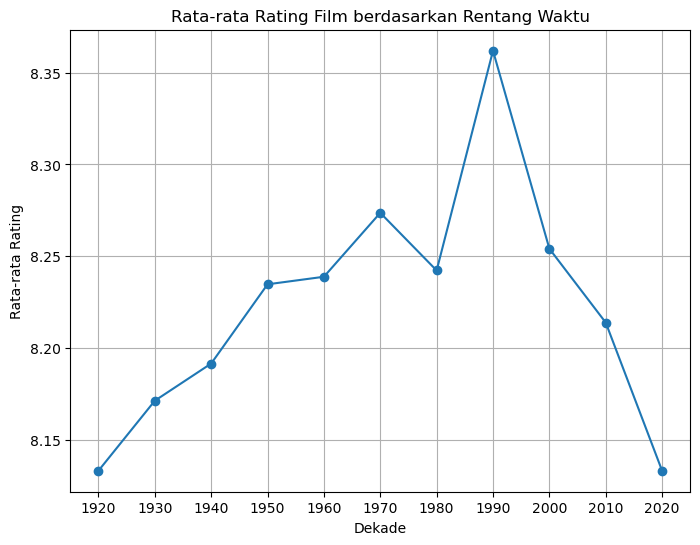

In [31]:
# Visualisasi
plt.figure(figsize=(8, 6))
plt.plot(average_rating_by_decade.index, average_rating_by_decade.values, marker='o')
plt.title('Rata-rata Rating Film berdasarkan Rentang Waktu')
plt.xlabel('Dekade')
plt.ylabel('Rata-rata Rating')
plt.xticks(average_rating_by_decade.index)
plt.grid(True)
plt.show()

In [36]:
for page in range(1, 10):
    # Mengirim permintaan GET ke URL dengan parameter halaman
    url3 = f"http://quotes.toscrape.com/page/{page}/"
    response3 = requests.get(url3)

    soup3 = BeautifulSoup(response3.content, "html.parser")

    # Mencari elemen <div> dengan kelas "quote"
    quote_divs = soup3.find_all("div", class_="quote")

    # Mengambil kutipan dan penulis dari setiap elemen <div> yang ditemukan
    for quote_div in quote_divs:
        # Mengambil teks kutipan dari elemen <span> dengan kelas "text"
        quote = quote_div.find("span", class_="text").text
        
        # Mengambil teks penulis dari elemen <small> dengan kelas "author"
        author = quote_div.find("small", class_="author").text
        
        print("Quote:", quote)
        print("Author:", author)
        print()

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein

Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling

Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein

Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen

Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe

Quote: “Try not to become a man of success. Rather become a man of value.”
Author: Albert Einstein

Quote: “It is better to be hated for what you are than to be loved for what you are not.”
Author: André Gide

Quote: “I have not failed. I've just found 10,000 ways that won't work.”
Author: Thomas

Quote: “That's the problem with drinking, I thought, as I poured myself a drink. If something bad happens you drink in an attempt to forget; if something good happens you drink in order to celebrate; and if nothing happens you drink to make something happen.”
Author: Charles Bukowski

Quote: “You don’t forget the face of the person who was your last hope.”
Author: Suzanne Collins

Quote: “Remember, we're madly in love, so it's all right to kiss me anytime you feel like it.”
Author: Suzanne Collins

Quote: “To love at all is to be vulnerable. Love anything and your heart will be wrung and possibly broken. If you want to make sure of keeping it intact you must give it to no one, not even an animal. Wrap it carefully round with hobbies and little luxuries; avoid all entanglements. Lock it up safe in the casket or coffin of your selfishness. But in that casket, safe, dark, motionless, airless, it will change. It will not be broken; it will become unbreakable, impenetrable, irredeemable. To